In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model performance load

### S. lycopersicum

In [2]:
l = pd.read_csv('./output/performance_model_lycopersicum_kmers.csv')
l

,chr,corr,R^2,MSE
0,chr1,0.871434,0.722333,0.008403
1,chr2,0.813087,0.308118,0.009735
2,chr3,0.843979,0.685377,0.008982
3,chr4,0.808353,0.618949,0.011925
4,chr5,0.810285,0.643644,0.008321
5,chr6,0.756440,0.570843,0.010992
6,chr7,0.862562,0.676451,0.011748
7,chr8,0.858841,0.688144,0.009091
8,chr9,0.925904,0.726442,0.011624
9,chr10,0.606018,0.310545,0.051308


### S. pimpinellifolium

In [3]:
p = pd.read_csv('./output/performance_model_pimpinellifolium_kmers.csv')
p

,chr,corr,R^2,MSE
0,chr1,0.859584,0.681150,0.008968
1,chr2,0.818070,0.372186,0.008641
2,chr3,0.834010,0.676047,0.008111
3,chr4,0.673134,0.436960,0.021848
4,chr5,0.776358,0.590346,0.009208
5,chr6,0.777455,0.603710,0.008744
6,chr7,0.871518,0.674210,0.011165
7,chr8,0.857988,0.683442,0.007801
8,chr9,0.916651,0.711125,0.010630
9,chr10,0.863491,0.691337,0.008321


### Trained in S. pimpinellifolium to predict in S. lycopersium

In [4]:
tp_pl = pd.read_csv('./output/performance_model_trained_in_pimpinellifolium_to_predict_in_lycopersicum_kmers.csv')
tp_pl

,chr,corr,R^2,MSE
0,chr1,0.869920,0.705180,0.008922
1,chr2,0.832787,0.560874,0.006179
2,chr3,0.858328,0.703393,0.008467
3,chr4,0.844178,0.674522,0.010186
4,chr5,0.829295,0.680321,0.007465
5,chr6,0.773063,0.588511,0.010540
6,chr7,0.877457,0.676365,0.011751
7,chr8,0.876974,0.707003,0.008541
8,chr9,0.930669,0.734451,0.011284
9,chr10,0.625265,0.324146,0.050296


### Trained in S. lycopersicum to predict in S. pimpinellifolium

In [5]:
tl_pp = pd.read_csv('./output/performance_model_trained_in_lycopersicum_to_predict_in_pimpinellifolium_kmers.csv')
tl_pp

,chr,corr,R^2,MSE
0,chr1,0.873729,0.740898,0.007288
1,chr2,0.824075,0.455692,0.007492
2,chr3,0.844567,0.689674,0.007770
3,chr4,0.683332,0.453559,0.021203
4,chr5,0.801910,0.623979,0.008452
5,chr6,0.760152,0.567317,0.009547
6,chr7,0.860938,0.696597,0.010398
7,chr8,0.788630,0.609501,0.009623
8,chr9,0.923487,0.782474,0.008005
9,chr10,0.894049,0.783576,0.005835


# Summary table

In [6]:
corr = pd.DataFrame({'corr':[l['corr'].mean().round(3), p['corr'].mean().round(3), tp_pl['corr'].mean().round(3), tl_pp['corr'].mean().round(3)]})
r2 = pd.DataFrame({'R^2':[l['R^2'].mean().round(3), p['R^2'].mean().round(3), tp_pl['R^2'].mean().round(3), tl_pp['R^2'].mean().round(3)]})
mse = pd.DataFrame({'MSE':[l['MSE'].mean().round(3), p['MSE'].mean().round(3), tp_pl['MSE'].mean().round(3), tl_pp['MSE'].mean().round(3)]})
training = pd.DataFrame({'Training set': ['S. lycopersicum', 'S. pimpinellifolium', 'S. pimpinellifolium', 'S. lycopersicum']})
testing = pd.DataFrame({'Testing set': ['S. lycopersicum', 'S. pimpinellifolium', 'S. lycopersicum', 'S. pimpinellifolium' ]})
cv = pd.DataFrame({'Cross-validation': ['CV1', 'CV1', 'CV2', 'CV2']})

table = pd.concat([cv, training, testing, corr, r2, mse], axis=1)
table

,Cross-validation,Training set,Testing set,corr,R^2,MSE
0,CV1,S. lycopersicum,S. lycopersicum,0.829,0.606,0.015
1,CV1,S. pimpinellifolium,S. pimpinellifolium,0.837,0.616,0.011
2,CV2,S. pimpinellifolium,S. lycopersicum,0.844,0.643,0.014
3,CV2,S. lycopersicum,S. pimpinellifolium,0.831,0.635,0.011


# Comparison plot

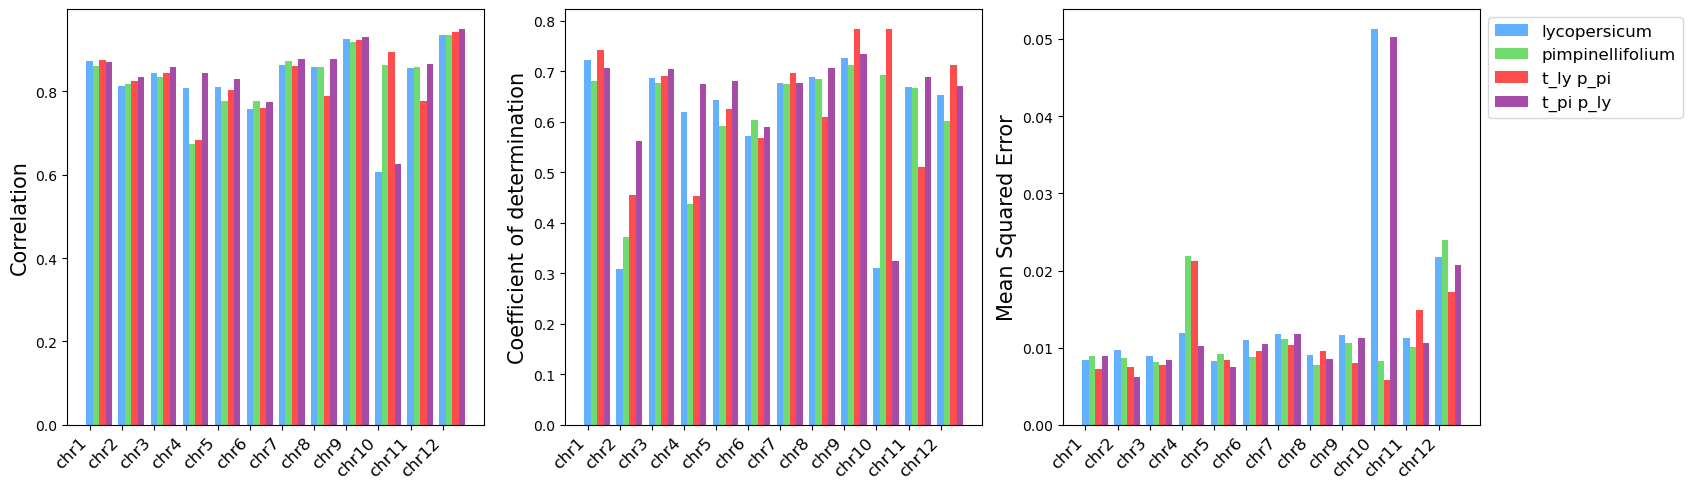

In [7]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_l = np.arange(len(l['chr']))
bar_positions_p = bar_positions_l + bar_width
bar_positions_tl_pp = bar_positions_p + bar_width
bar_positions_tp_pl = bar_positions_tl_pp + bar_width


# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_l, l['corr'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[0].bar(bar_positions_p, p['corr'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[0].bar(bar_positions_tl_pp, tl_pp['corr'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[0].bar(bar_positions_tp_pl, tp_pl['corr'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_l, l['R^2'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[1].bar(bar_positions_p, p['R^2'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[1].bar(bar_positions_tl_pp, tl_pp['R^2'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[1].bar(bar_positions_tp_pl, tp_pl['R^2'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_l, l['MSE'], color='dodgerblue', width=bar_width, label='lycopersicum', alpha=0.7)
axs[2].bar(bar_positions_p, p['MSE'], color='limegreen', width=bar_width, label='pimpinellifolium', alpha=0.7)
axs[2].bar(bar_positions_tl_pp, tl_pp['MSE'], color='red', width=bar_width, label='t_ly p_pi', alpha=0.7)
axs[2].bar(bar_positions_tp_pl, tp_pl['MSE'], color='purple', width=bar_width, label='t_pi p_ly', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = l['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_l)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()